In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 모든 컬럼, 로우 출력/요약 출력
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows', None)

## 데이터 불러오기
### 연결데이터와 별도데이터 병합하기

In [37]:
# 데이터 불러오기
consolidated = pd.read_csv('데이터/data/연결기업72.csv', encoding='CP949')
separate = pd.read_csv('데이터/data/별도기업72.csv', encoding='CP949')
kgaap = pd.read_csv('데이터/data/케이갭71.csv', encoding='CP949')


# 연결, 개별, 케이갭 데이터 비교하고 확인
print('<연결>')
print('행렬 수 : ', consolidated.shape)
print('회사 수 : ', consolidated['회사명'].nunique())

print('\n<별도>')
print('행렬 수 : ', separate.shape)
print('회사 수 : ', separate['회사명'].nunique())

print('\n<케이갭>')
print('행렬 수 : ', kgaap.shape)
print('회사 수 : ', kgaap['회사명'].nunique())

<연결>
행렬 수 :  (20947, 75)
회사 수 :  2456

<별도>
행렬 수 :  (20947, 75)
회사 수 :  2456

<케이갭>
행렬 수 :  (20831, 74)
회사 수 :  2388


In [14]:
# 데이터 프레임 결측치 합 확인
# consolidated.isna().sum()
# separate.isna().sum()
# kgaap.isna().sum()

In [38]:
# 컬럼명에 불필요 문자 제거
consolidated.columns = consolidated.columns.str.replace('(', '')
consolidated.columns = consolidated.columns.str.replace(')', '')
consolidated.columns = consolidated.columns.str.replace('대분류', '')
consolidated.columns = consolidated.columns.str.replace('관계기업투자손익 제외', '')
consolidated.columns = consolidated.columns.str.replace('이자비용', '')
consolidated.columns = consolidated.columns.str.replace('IFRS', '')
consolidated.columns = consolidated.columns.str.replace('연결', '')

separate.columns = separate.columns.str.replace('(', '')
separate.columns = separate.columns.str.replace(')', '')
separate.columns = separate.columns.str.replace('대분류', '')
separate.columns = separate.columns.str.replace('관계기업투자손익 제외', '')
separate.columns = separate.columns.str.replace('이자비용', '')
separate.columns = separate.columns.str.replace('IFRS', '')
separate.columns = separate.columns.str.replace('IFRS', '')


# 컬럼명 변경
consolidated.rename(columns={'통계청 한국표준산업분류 10차': '업종'}, inplace=True)
separate.rename(columns={'통계청 한국표준산업분류 10차': '업종'}, inplace=True)


# 컬럼명 재정렬
consolidated = consolidated[[
       '회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', 
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',                                   # 성장성
       '유형자산증가율', '유동자산증가율', '재고자산증가율',                                                                                     # 성장성
       '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율',                           # 안정성
       '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',      # 안정성
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율',                                         # 안정성
       '유동부채비율','단기차입금 대 총차입금비율', '차입금의존도', '차입금비율',                                                                 # 안정성
       '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율',                                                        # 생산성
       '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',                                                                            # 생산성
       '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률',                                                               # 수익성
       '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율',                                          # 수익성
       '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율',                                       # 수익성
       '금융손익비율', '매출원가 대 매출액비율', '이자부담률', '지급이자율', '차입금평균이자율',                                                   # 수익성
       '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',                                                                      # 활동성
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률',                                                 # 활동성
       '유형자산회전율'                                                                                                                        # 활동성
       ]]

separate = separate[[
       '회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', 
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',                                   # 성장성
       '유형자산증가율', '유동자산증가율', '재고자산증가율',                                                                                     # 성장성
       '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율',                           # 안정성
       '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',      # 안정성
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율',                                         # 안정성
       '유동부채비율','단기차입금 대 총차입금비율', '차입금의존도', '차입금비율',                                                                 # 안정성
       '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율',                                                        # 생산성
       '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',                                                                            # 생산성
       '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률',                                                               # 수익성
       '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율',                                          # 수익성
       '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율',                                       # 수익성
       '금융손익비율', '매출원가 대 매출액비율', '이자부담률', '지급이자율', '차입금평균이자율',                                                   # 수익성
       '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',                                                                      # 활동성
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률',                                                 # 활동성
       '유형자산회전율'                                                                                                                        # 활동성
       ]]


consolidated2 = consolidated.copy()

# 연결기업 데이터프레임의 결측치를 개별기업 데이터로 대체
for i in consolidated2.columns:
    consolidated2[i] = consolidated2[i].fillna(separate[i])


# 재무비율이 NaN 값인 것들의 인덱스 리스트 생성
index_to_drop = consolidated2.index[consolidated2.iloc[:, 6:].isna().all(1)].tolist()
# print(len(index_to_drop)) #-> 1962
# consolidated2.shape  #-> (20947, 75)


# 재무비율이 NaN인 행 제거
consolidated2.drop(consolidated2.index[index_to_drop], inplace=True)
consolidated2.reset_index(drop=True, inplace=True)
# consolidated2.shape # -> (18985, 75)


# 데이터 프레임 저장
consolidated2.to_csv('데이터/1차 전처리/연결별도_72피처병합.csv', encoding='CP949', index=False)

<ipython-input-38-80489fa62395>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  consolidated.columns = consolidated.columns.str.replace('(', '')
<ipython-input-38-80489fa62395>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  consolidated.columns = consolidated.columns.str.replace(')', '')
<ipython-input-38-80489fa62395>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  separate.columns = separate.columns.str.replace('(', '')
<ipython-input-38-80489fa62395>:11: FutureWarning: The default value of regex will change from Tru

#### 업종구분
- 경기민감업종 : 제조업, 건설업, 도소매업, 숙박/음식점업, 부동산업, 임대업
  
    제조업: 제조업  
    건설업: 건설업  
    도소매업: 도매 및 소매업  
    숙박/음식점업: 숙박 및 음식점업  
    부동산업: 부동산업  
    임대업: 사업시설 관리, 사업 지원 및 임대 서비스업 -> 임대업  

## 부실기업 정의

### 데이터 확인

In [39]:
# 불러오기
df = pd.read_csv('데이터/1차 전처리/연결별도_72피처병합.csv', encoding='CP949')

# 업종 수 확인
# df['업종'].nunique()  #-> 17


# '사업시설 관리, 사업 지원 및 임대 서비스업'을 '임대업'으로 이름 변경
df['업종'] = df['업종'].str.replace('사업시설 관리, 사업 지원 및 임대 서비스업', '임대업')


# 회사명 리스트 생성
company_list = df['회사명'].unique()


# 행 개수가 3개 이상인 기업 리스트 및 수
over_three = []
for i in company_list:
    if len(df[df['회사명']==i]) >= 3:
        over_three.append(i)
print('행 개수 3개 이상 : ', len(over_three))


# 행 개수가 2개 이상인 기업 리스트 및 수
over_two = []
for i in company_list:
    if len(df[df['회사명']==i]) >= 2:
        over_two.append(i)
print('행 개수 2개 이상 : ',len(over_two))


# 행 개수가 3개 이상인 기업 인덱스
over_three_index = []
for i in over_three:
    over_three_index.append(df[df['회사명']==i].index)


# 행 개수가 2개 이상인 기업 인덱스
over_two_index = []
for i in over_two:
    over_two_index.append(df[df['회사명']==i].index)

행 개수 3개 이상 :  2145


In [40]:
over_three

['(주)CMG제약',
 '(주)DB하이텍',
 '(주)ES큐브',
 '(주)HJ중공업',
 '(주)MH에탄올',
 '(주)SH에너지화학',
 '(주)SIMPAC',
 '(주)SNT에너지',
 '(주)SNT홀딩스',
 '(주)STX',
 '(주)TCC스틸',
 '(주)가비아',
 '(주)강스템바이오텍',
 '(주)강원랜드',
 '(주)강원에너지',
 '(주)갤럭시아에스엠',
 '(주)경농',
 '(주)경동나비엔',
 '(주)경동도시가스',
 '(주)경동인베스트',
 '(주)경방',
 '(주)경보제약',
 '(주)경인양행',
 '(주)고려시멘트',
 '(주)고영테크놀러지',
 '(주)골드앤에스',
 '(주)골드퍼시픽',
 '(주)골프존',
 '(주)골프존뉴딘홀딩스',
 '(주)광림',
 '(주)광명전기',
 '(주)광무',
 '(주)광주신세계',
 '(주)구영테크',
 '(주)국동',
 '(주)국보',
 '(주)국보디자인',
 '(주)국순당',
 '(주)국영지앤엠',
 '(주)그래디언트',
 '(주)그리티',
 '(주)그린플러스',
 '(주)글로벌스탠다드테크놀로지',
 '(주)금양',
 '(주)금호에이치티',
 '(주)금화피에스시',
 '(주)기가레인',
 '(주)기산텔레콤',
 '(주)까뮤이앤씨',
 '(주)까스텔바작',
 '(주)나노',
 '(주)나노브릭',
 '(주)나노신소재',
 '(주)나노엔텍',
 '(주)나래나노텍',
 '(주)나무가',
 '(주)나스미디어',
 '(주)나이벡',
 '(주)나이스디앤비',
 '(주)나이스홀딩스',
 '(주)남선알미늄',
 '(주)남성',
 '(주)내츄럴엔도텍',
 '(주)네오리진',
 '(주)네오오토',
 '(주)네오위즈',
 '(주)네오위즈홀딩스',
 '(주)네오크레마',
 '(주)네오티스',
 '(주)네오팜',
 '(주)네오펙트',
 '(주)네이블커뮤니케이션즈',
 '(주)네이처셀',
 '(주)네패스',
 '(주)넥센',
 '(주)넥솔론',
 '(주)넥스지',
 '(주)넥스턴바이오사이언스',
 '(주)넥스트아이',


### 부실기업 정의 코드
    부실기업 정의 2개를 하나의 포문안에 조건문으로 한번에 하면,
    첫번째 조건을 무시한채 두번째 조건으로 덮어씌워지기 때문에 하나씩 나눠서 지정해줌

In [17]:
# 3년 연속 이자보상배율이 1미만인 기업을 부실기업으로 정의
icr_count = 0
df['부실기업1'] = ''

for i in over_three_index:
    for j in i:
        if df.loc[j, '이자보상배율'] < 1:
            icr_count += 1
        else:
            icr_count = 0
                    
        if icr_count >= 3:
            df.loc[j, '부실기업1'] = 1
        else:
            df.loc[j, '부실기업1'] = 0


#2년 연속 매출액이 20% 이상 감소한 기업을 부실기업으로 정의
sales_count = 0
df['부실기업2'] = ''

for i in over_two_index:
    for j in i:
        if df.loc[j, '매출액증가율'] < -20:
            sales_count += 1
        else:
            sales_count = 0
                    
        if sales_count >= 2:
            df.loc[j, '부실기업2'] = 1
        else:
            df.loc[j, '부실기업2'] = 0


df['부실기업'] = ''
for i in df.index:
    if df.loc[i, '부실기업1'] == 1 or df.loc[i, '부실기업2'] == 1:
        df.loc[i, '부실기업'] = 1
    else:
        df.loc[i, '부실기업'] = 0


print('부실기업 첫번째 정의에 해당하는 기업의 수\n', df['회사명'][df['부실기업1']==1].nunique())
print('\n부실기업 두번째 정의에 해당하는 기업의 수\n', df['회사명'][df['부실기업2']==1].nunique())
print('\n부실기업 두가지 정의 모두에 해당하는 기업의 수\n', df['회사명'][df['부실기업']==1].nunique())
print('\n총 기업 수\n', df['회사명'].nunique())


# 부실기업 정의 저장
df.to_csv('데이터/1차 전처리/부실기업지정.csv', encoding='CP949', index=False)

부실기업 첫번째 정의에 해당하는 기업의 수
 740

부실기업 두번째 정의에 해당하는 기업의 수
 285

부실기업 두가지 정의 모두에 해당하는 기업의 수
 846

총 기업 수
 2371


## 결측치 및 이상치 처리

In [18]:
df = pd.read_csv('데이터/1차 전처리/부실기업지정.csv', encoding='CP949')

# 컬럼 재정렬
df = df[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종', '총자본증가율',
       '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율']]

### 이상치 처리 전 시각화

<AxesSubplot:>

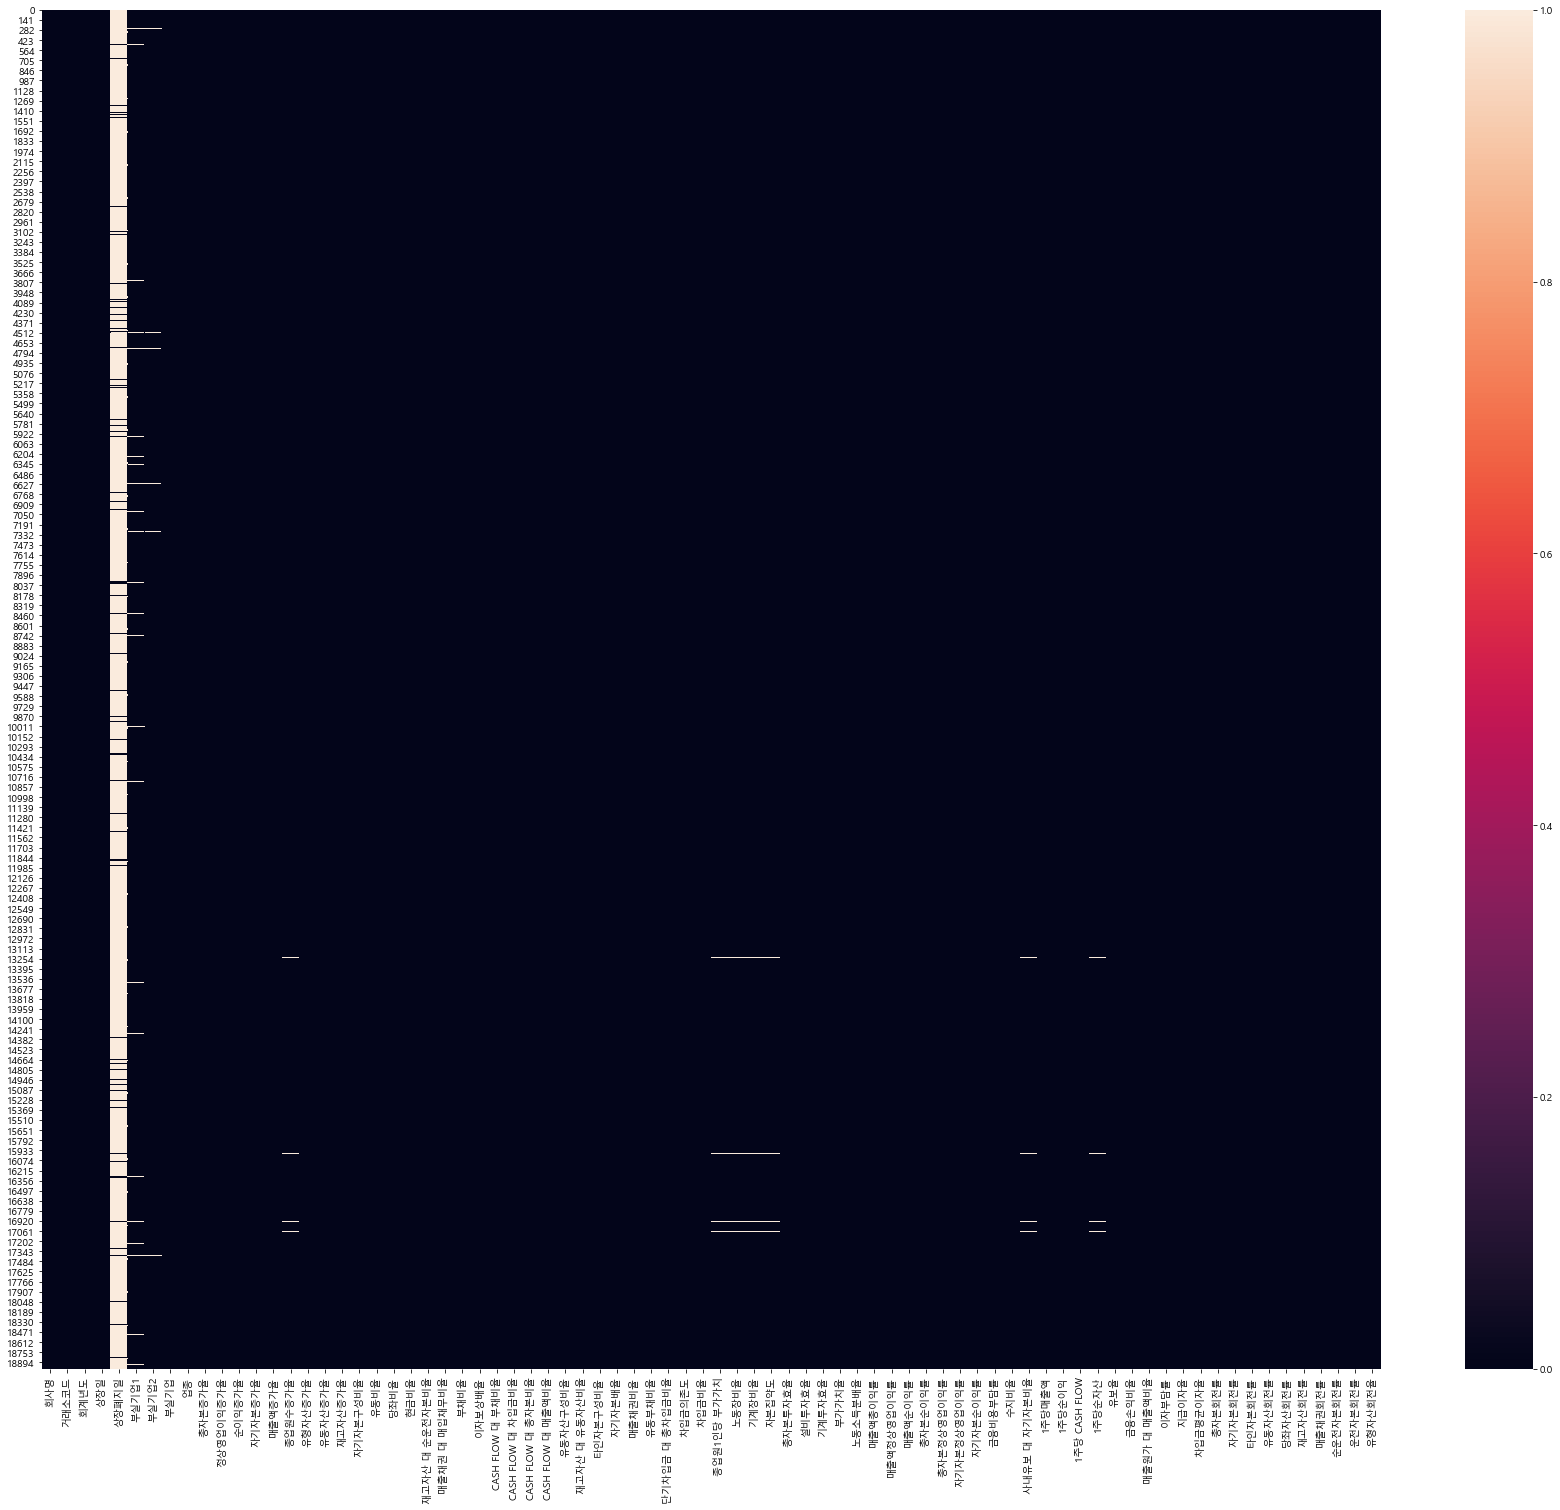

In [19]:
# 이상치 처리 전 결측치 히트맵
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

### 회계년도가 12월이 아닌 행 전처리

In [20]:
df2 = df.copy()

# 회계년도가 12월이 아닌 행 리스트 생성
not_dec_list = df2[~df2.loc[:,'회계년도'].str.endswith('12')].index.tolist()


# 회계년도가 12월이 아닌 행 제거 : (18985, 78) -> (18838, 78)
df2.drop(df2.index[not_dec_list], inplace=True)
df2.reset_index(drop=True, inplace=True)


# 아인스엔앰엔, 에피밸리, (주)큐리언트 삭제
company_drop_list = ['아인스엔앰엔', '에피밸리', '(주)큐리언트']
df2.drop(df2[df2['회사명'].isin(company_drop_list)].index, inplace=True)
df2.reset_index(drop=True, inplace=True)

### 이자보상배율 결측치 및 이상치 전처리

In [21]:
df3 = df2.copy()

# 이자보상배율이 NaN인 기업
nan_icr_list = df3['회사명'][df3['이자보상배율'].isna()].index


# 이자보상배율이 NaN인 행 제거
df3.drop(df3.index[nan_icr_list], inplace=True)
df3.reset_index(drop=True, inplace=True)


# 이자보상배율이 999999999인 것을 해당 기업의 평균 이자보상배율 값으로 대체
df3.loc[df3['이자보상배율']==999999999, '이자보상배율'] = np.nan
df3['이자보상배율'] = df3['이자보상배율'].fillna(df3.groupby('회사명')['이자보상배율'].transform('mean'))

### 거래소코드 전처리

In [22]:
# 거래소 코드 6자리가 아닌 것들은 6자리가 될 때까지 앞에 0 추가
df3['거래소코드'] = df3['거래소코드'].astype(str).str.zfill(6)

### 기술성장기업 전처리

In [23]:
df4 = df3.copy()

# 기술성장기업 제거
tg_df = pd.read_csv('데이터/data/기술성장기업list.csv', encoding='CP949')


# 종목코드가 6자리가 아닌 것들 앞에 0추가
tg_df['종목코드'] = tg_df['종목코드'].astype(str).str.zfill(6)


# 제거해야할 기술성장기업 종목코드 리스트
tg_code_list = tg_df['종목코드'].unique().tolist()


# 기술성장기업의 코드와 겹치는 행 제거
df4 = df4.drop(df4[df4['거래소코드'].isin(tg_code_list)].index)
df4.reset_index(drop=True, inplace=True)
print('기술성장기업의 코드와 겹치는 행 제거 : ', df4.shape) 

기술성장기업의 코드와 겹치는 행 제거 :  (18209, 78)


### 거래소코드 9로 시작하는 기업 전처리

In [24]:
df5 = df4.copy()

# 거래소코드가 9로 시작하는 기업
code_nine_list = df5['회사명'][df5['거래소코드'].astype(str).str.startswith('9')].unique()


# 거래소코드가 9로 시작하는 기업 제거
df5 = df5[~df5['회사명'].isin(code_nine_list)]
df5.reset_index(drop=True, inplace=True)
print('거래소코드가 9로 시작하는 기업 제거 : ', df5.shape)

거래소코드가 9로 시작하는 기업 제거 :  (18074, 78)


### 제무재표 기록이 하나인 기업 전처리

In [25]:
df6 = df5.copy()

# 기업 기록이 하나인 기업
single_rows = df6['회사명'].value_counts() < 2

# 기업 기록이 하나인 기업 제거
df6 = df6[~df6['회사명'].isin(single_rows[single_rows].index)]
df6.reset_index(drop=True, inplace=True)
print('기업 기록이 하나인 기업 제거 : ', df6.shape)

기업 기록이 하나인 기업 제거 :  (17972, 78)


### 변경된 회사명 또는 거래소코드 전처리

In [26]:
df7 = df6.copy()

# 회사명은 하난데 거래소코드가 두개 이상인 회사
dup_comp = df7.groupby('회사명')['거래소코드'].nunique() > 1
dup_comp[dup_comp].index.values


# 삭제
company_drop_list = ['(주)본느', '(주)세화피앤씨', '(주)신성이엔지', '(주)아이엘사이언스', '(주)알로이스', '(주)인산가',
       '(주)정다운', '(주)티에스트릴리온', '(주)포인트엔지니어링', '(주)한국비엔씨', '삼성물산(주)',
       '씨아이에스(주)', '에스케이(주)', '엠에프엠코리아(주)', '줌인터넷(주)', '패션플랫폼(주)']
df7.drop(df7[df7['회사명'].isin(company_drop_list)].index, inplace=True)
df7.reset_index(drop=True, inplace=True)


# 거래소코드는 하난데 회사명이 두개 이상인 거래소코드
dup_code = df7.groupby('거래소코드')['회사명'].nunique() > 1
dup_code[dup_code].index.values


# 제이콘텐트리와 콘텐트리중앙이 겹치기 때문에 제이콘텐트리 제거
df7.drop(df7[df7['회사명']=='(주)제이콘텐트리'].index, inplace=True)
df7.reset_index(drop=True, inplace=True)

### 상장일이 두개인데 상장폐지일이 있는 기업 전처리

In [27]:
df8 = df7.copy()

# 상장일이 두개 이상인 기업
dup_listdate = df8.groupby(['회사명','거래소코드'])['상장일'].nunique().reset_index()
dup_listdate[dup_listdate['상장일']>1]


# 상장일이 두개 이상인 기업 리스트
dup_listdate_company = dup_listdate['회사명'][dup_listdate['상장일']>1]


# 상장일이 두개 이상인데 상장폐지일이 있는 행 삭제
df8.drop(df8[df8['회사명'].isin(dup_listdate_company) & df8['상장폐지일'].notnull()].index, inplace=True)
df8.reset_index(drop=True, inplace=True)
df8[df8['회사명'].isin(dup_listdate_company) & df8['상장폐지일'].notnull()]


# 체크포인트
df8.to_csv('데이터/1차 전처리/전처리part1.csv', encoding='CP949', index=False)

## 파생변수 합치기

In [28]:
# 전처리part1 불러오기
df = pd.read_csv('데이터/1차 전처리/전처리part1.csv', encoding='CP949')             # (17809, 78)

# 파생변수 1차 불러오기
dfdf = pd.read_csv('데이터/1차 전처리/파생변수merge_1차.csv', encoding='CP949')     # (17809, 89)
dfdf2 = pd.read_csv('데이터/1차 전처리/파생변수merge_성장성.csv', encoding='CP949') # (17809, 83)

In [462]:
dfdf.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본구성비율_x', '유동비율', '당좌비율', '현금비율',
       '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_x', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액_x', '1주당순이익_x',
       '1주당 CASH FLOW', '1주당순자산_x', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율',
       '종업원1

In [463]:
dfdf2.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
       '총자본증가율', '정상영업이익증가율', '순이익증가율_x', '자기자본증가율_x', '매출액증가율_x', '종업원수증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율',
       '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율',
       '총자산증가율',

In [29]:
df_part2 = df.copy()

# 파생변수 추가하기
df_part2[['종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '1주당매출액_y',
       '1주당순이익_y', '1주당Cashflow', '1주당순자산_y', '노동소득분배율_y', '자기자본구성비율_y',
       '재고자산대순운전자본비율']] = dfdf[['종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '1주당매출액_y',
       '1주당순이익_y', '1주당Cashflow', '1주당순자산_y', '노동소득분배율_y', '자기자본구성비율_y',
       '재고자산대순운전자본비율']] 
df_part2[['총자산증가율', '자기자본증가율_y', '정상영업손익증가율', '순이익증가율_y', '매출액증가율_y']] = dfdf2[['총자산증가율', 
       '자기자본증가율_y', '정상영업손익증가율', '순이익증가율_y', '매출액증가율_y']]

df_part2_copy = df_part2.copy()


# 칼럼 삭제
df_part2_copy.drop(columns=['유형자산증가율', '유동자산증가율', '재고자산증가율', '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', 
       '유동부채비율', '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '유형자산회전율'], inplace=True)


# 컬럼 재정렬
df_part2_copy = df_part2_copy[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
        '총자본증가율', '총자산증가율', '정상영업이익증가율', '순이익증가율', '순이익증가율_y', '자기자본증가율', '자기자본증가율_y', '매출액증가율',#성장률 기존
        '매출액증가율_y', '종업원수증가율', '정상영업손익증가율', # 성장률 new 컬럼
        
        '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률',
        '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당매출액_y', 
        '1주당순이익', '1주당순이익_y', '1주당 CASH FLOW', '1주당Cashflow', '1주당순자산', '1주당순자산_y', '유보율', # 수익성 기존
        # 수익성 new 컬럼
        
        '자기자본구성비율', '자기자본구성비율_y', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율',
        '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', #안전성 기존
        '재고자산대순운전자본비율', #안전성 new 컬럼
        
        '종업원1인당 부가가치', '노동장비율','기계장비율', '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율',
        '부가가치율', '노동소득분배율', '노동소득분배율_y', # 생산성 기존
        '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', #생산성 new 컬럼
        
        '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', 
        '매출채권회전률', '순운전자본회전률', #활동성기존
        '운전자본회전률']] #활동성 new 컬럼


# 칼럼명 수정
df_part2_copy = df_part2_copy.rename(columns={'총자산증가율' : '총자본증가율_y'})
df_part2_copy = df_part2_copy.rename(columns={'1주당Cashflow' : '1주당 CASH FLOW_y'})

# 저장
df_part2_copy.to_csv('데이터/2차 전처리/전처리part2.csv', index=False, encoding='CP949')


### 회계년도가 상장일 보다 빠른 기업, 불필요 컬럼 제거

In [20]:
df_part2_copy.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
       '총자본증가율', '총자본증가율_y', '정상영업이익증가율', '순이익증가율', '순이익증가율_y', '자기자본증가율',
       '자기자본증가율_y', '매출액증가율', '매출액증가율_y', '종업원수증가율', '정상영업손익증가율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당매출액_y',
       '1주당순이익', '1주당순이익_y', '1주당 CASH FLOW', '1주당 CASH FLOW_y', '1주당순자산',
       '1주당순자산_y', '유보율', '자기자본구성비율', '자기자본구성비율_y', '유동비율', '당좌비율', '현금비율',
       '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '재고자산대순운전자본비율', '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율',
       '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '노동소득분배율_y', '종업원1인당부가가치율_계산',
       '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본회전률', '자기자본회전률', '타인자본회전률',
       '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률'],
      dtype='ob

In [21]:
# 전처리part2 불러오기
df_part2_copy = pd.read_csv('데이터/2차 전처리/전처리part2.csv', encoding='CP949')

df_part2_copy2 = df_part2_copy.copy()


# 회계년도, 상장일 포멧 변경
df_part2_copy2['회계년도'] = pd.to_datetime(df_part2_copy2['회계년도'], format='%Y/%m')
df_part2_copy2['회계년도'] = df_part2_copy2['회계년도'].dt.strftime('%Y%m')

df_part2_copy2['상장일'] = pd.to_datetime(df_part2_copy2['상장일'], format='%Y/%m')
df_part2_copy2['상장일'] = df_part2_copy2['상장일'].dt.strftime('%Y%m')


# 회계년도가 상장일 보다 빠른 기업 제거
df_part2_copy2.drop(df_part2_copy2[df_part2_copy2['회계년도'] < df_part2_copy2['상장일']].index, inplace=True)
df_part2_copy2.reset_index(drop=True, inplace=True)
print('회계년도가 상장일 보다 빠른 기업 제거 : ', df_part2_copy2.shape)    # 깃허브 -> (16752, 77)


# (주)카이노스메드 제거
df_part2_copy2.drop(df_part2_copy2[df_part2_copy2['회사명']=='(주)카이노스메드'].index, inplace=True)
df_part2_copy2.reset_index(drop=True, inplace=True)
print('(주)카이노스메드 제거 : ', df_part2_copy2.shape)    # 깃허브 -> (16748, 77)


# 불필요 컬럼 제거
df_part2_copy2.drop(columns=['매출액총이익률', '1주당매출액', '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '자기자본구성비율', '재고자산 대 순운전자본비율', 
                            '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '노동소득분배율'], inplace=True)
print('불필요 컬럼 제거 : ', df_part2_copy2.shape)    # 깃허브 -> (16748, 64)


# 저장
# df_part2_copy2.to_csv('데이터/2차 전처리/전처리part2_copy.csv', index=False, encoding='CP949')

회계년도가 상장일 보다 빠른 기업 제거 :  (16752, 76)
(주)카이노스메드 제거 :  (16748, 76)
불필요 컬럼 제거 :  (16748, 64)


### 결측치 대체 및 삭제

In [22]:
df_part2_copy2.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
       '총자본증가율', '총자본증가율_y', '정상영업이익증가율', '순이익증가율', '순이익증가율_y', '자기자본증가율',
       '자기자본증가율_y', '매출액증가율', '매출액증가율_y', '종업원수증가율', '정상영업손익증가율', '매출액정상영업이익률',
       '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률',
       '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액_y', '1주당순이익_y',
       '1주당 CASH FLOW_y', '1주당순자산_y', '유보율', '자기자본구성비율_y', '유동비율', '당좌비율',
       '현금비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '재고자산대순운전자본비율', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_y',
       '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본회전률',
       '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률',
       '순운전자본회전률', '운전자본회전률'],
      dtype='object')

In [23]:
df_part2_copy3 = df_part2_copy2.copy()

# 대체값 컬럼을 데이터프레임으로 생성
rep_columns = df_part2_copy3[['총자본증가율_y', '정상영업손익증가율' , '순이익증가율_y', '자기자본증가율_y','매출액증가율_y']]


# 0인 값을 nan으로 변경
df_part2_copy3[['총자본증가율', '정상영업손익증가율', '순이익증가율', '자기자본증가율', '매출액증가율']].replace(0, np.nan, inplace=True)

# 저장
df_part2_copy3.to_csv('데이터/2차 전처리/1.csv', index=False, encoding='CP949')



# nan값 대체
df_part2_copy3[['총자본증가율', '정상영업이익증가율' , '순이익증가율', '자기자본증가율','매출액증가율']].fillna(rep_columns[['총자본증가율_y', '정상영업손익증가율' , '순이익증가율_y', '자기자본증가율_y','매출액증가율_y']])
df_part2_copy3[['총자본증가율', '정상영업이익증가율' , '순이익증가율', '자기자본증가율','매출액증가율']].isna().sum()
print(df_part2_copy3.shape)


# (주)서한 결측치 행을 해당 업체의 평균값으로 대체
seohan_mean = df_part2_copy3[['총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_y', '종업원1인당부가가치율_계산']][df_part2_copy3['회사명']=='(주)서한'].mean()

df_part2_copy3.loc[3040, ['총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_y', '종업원1인당부가가치율_계산']] = seohan_mean
df_part2_copy3.loc[3041, ['총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_y', '종업원1인당부가가치율_계산']] = seohan_mean
print('(주)서한: ', df_part2_copy3.shape) 


# 대림통상(주)와 씨제이프레시웨이(주)의 종업원1인당부가가치율_계산 결측치를 각 기업의 평균으로 대체
df_part2_copy3.loc[10923, '종업원1인당부가가치율_계산'] = 65.91
df_part2_copy3.loc[13154, '종업원1인당부가가치율_계산'] = 62.77


# 경인전자의 이자보상배율은 최대값으로 남화토건의 이자보상배율은 최소값으로 대체
df_part2_copy3['이자보상배율'][df_part2_copy3['회사명']=='경인전자(주)'] = df_part2_copy3['이자보상배율'].max()
df_part2_copy3['이자보상배율'][df_part2_copy3['회사명']=='남화토건(주)'] = df_part2_copy3['이자보상배율'].min()


# 피에스케이(주) 제거 -> 계산을 해도  ts에서 값을 받아올 수 없었음
df_part2_copy3.drop([15669, 15670], axis=0, inplace=True)
df_part2_copy3.reset_index(drop=True, inplace=True)
print('피에스케이(주): ', df_part2_copy3.shape) 


# (주)영진코퍼레이션 2014년도 기록 제거 -> 13년도에 부실기업이 돼서 2014년엔 필요 없는 데이터라서 미리 삭제
df_part2_copy3.drop([5511], axis=0, inplace=True)
df_part2_copy3.reset_index(drop=True, inplace=True)
df_part2_copy3[df_part2_copy3['회사명']=='(주)영진코퍼레이션']
print('(주)영진코퍼레이션: ', df_part2_copy3.shape)    # (16745, 64)


# 저장
df_part2_copy3.to_csv('데이터/2차 전처리/전처리part3.csv', index=False, encoding='CP949')

c:\Users\subin\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(16748, 64)
(주)서한:  (16748, 64)
피에스케이(주):  (16746, 64)
(주)영진코퍼레이션:  (16745, 64)


<ipython-input-23-f4b544ca7ffd>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2_copy3['이자보상배율'][df_part2_copy3['회사명']=='경인전자(주)'] = df_part2_copy3['이자보상배율'].max()
<ipython-input-23-f4b544ca7ffd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2_copy3['이자보상배율'][df_part2_copy3['회사명']=='남화토건(주)'] = df_part2_copy3['이자보상배율'].min()


## 컬럼 개수 51개로 맞추기

In [24]:
# 전처리part3 불러오기
df_part3 = pd.read_csv('데이터/2차 전처리/전처리part3.csv', encoding='CP949')


# 컬럼 51
df_part3 = df_part3[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '부실기업1', '부실기업2', '부실기업', '업종',
        '총자본증가율_y', '순이익증가율_y' ,'자기자본증가율_y', '매출액증가율_y', '종업원수증가율', '정상영업손익증가율', '매출액정상영업이익률',
        '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률',
        '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액_y', '1주당순이익_y',
        '1주당 CASH FLOW_y', '1주당순자산_y', '유보율', '자기자본구성비율_y', '유동비율', '당좌비율',
        '현금비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
        '재고자산대순운전자본비율', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율_y',
        '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본회전률',
        '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률',
        '순운전자본회전률']]
        
df_part3.columns = df_part3.columns.str.replace('_y', '')

### 자기자본회전률 합치고 처리

In [32]:
df_part3_copy = df_part3.copy()

# 자기자본회전률 불러오기
df_col_rep = pd.read_csv('데이터/2차 전처리/파생변수merge_2차.csv', encoding='CP949')


# 자기자본회전률 nan값 대체
df_part3_copy['자기자본회전률'] = df_col_rep['자기자본회전률']
df_part3_copy[['회사명', '회계년도', '상장일']][df_part3_copy['자기자본회전률'].isna()]


# 기업 기록이 하나인 기업
single_rows2 = df_part3_copy['회사명'].value_counts() < 2


# 기업 기록이 하나인 기업 제거
df_part3_copy = df_part3_copy[~df_part3_copy['회사명'].isin(single_rows2[single_rows2].index)]
df_part3_copy.reset_index(drop=True, inplace=True)
print('기업 기록이 하나인 기업 제거 : ', df_part3_copy.shape)

df_part3_copy[['총자본증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '정상영업손익증가율']].fillna(0, inplace=True)
################################################################################
df_part3_copy[df_part3_copy[['총자본증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '정상영업손익증가율']]==0].value_counts()


# 저장
df_part3_copy.to_csv('데이터/2차 전처리/전처리part4.csv', index=False, encoding='CP949')

기업 기록이 하나인 기업 제거 :  (16705, 58)


c:\Users\subin\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
# 전처리part3 불러오기
df_part4 = pd.read_csv('데이터/2차 전처리/전처리part4.csv', encoding='CP949')  # (16745, 63)


# 결측치가 있는 컬럼 내림차순으로 확인
nan_count = df_part4.isna().sum(0).reset_index()
nan_count = nan_count.sort_values(by=0, ascending=False)
nan_count.head(15)


df_part5 = df_part4.copy()

# 결측치 없는거 확인 후 저장
df_part5.to_csv('데이터/2차 전처리/전처리part5.csv', index=False, encoding='CP949')

,index,0
4,상장폐지일,15958
5,부실기업1,94
12,매출액증가율,75
10,순이익증가율,74
14,정상영업손익증가율,74
9,총자본증가율,72
11,자기자본증가율,72
51,자기자본회전률,1
43,기계투자효율,0
42,설비투자효율,0


In [27]:
df_part5.shape

(16705, 58)

In [28]:
df_part5.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
상장일                      0
상장폐지일                15958
부실기업1                   94
부실기업2                    0
부실기업                     0
업종                       0
총자본증가율                  72
순이익증가율                  74
자기자본증가율                 72
매출액증가율                  75
종업원수증가율                  0
정상영업손익증가율               74
매출액정상영업이익률               0
매출액순이익률                  0
총자본순이익률                  0
총자본정상영업이익률               0
자기자본정상영업이익률              0
자기자본순이익률                 0
금융비용부담률                  0
수지비율                     0
사내유보 대 자기자본비율            0
1주당매출액                   0
1주당순이익                   0
1주당 CASH FLOW            0
1주당순자산                   0
유보율                      0
자기자본구성비율                 0
유동비율                     0
당좌비율                     0
현금비율                     0
매출채권 대 매입채무비율            0
부채비율                     0
이자보상배율                   0
CASH FLOW 대 부채비율         0
C

## 결측치 및 이상치 확인
### 결측치 히트맵

<AxesSubplot:>

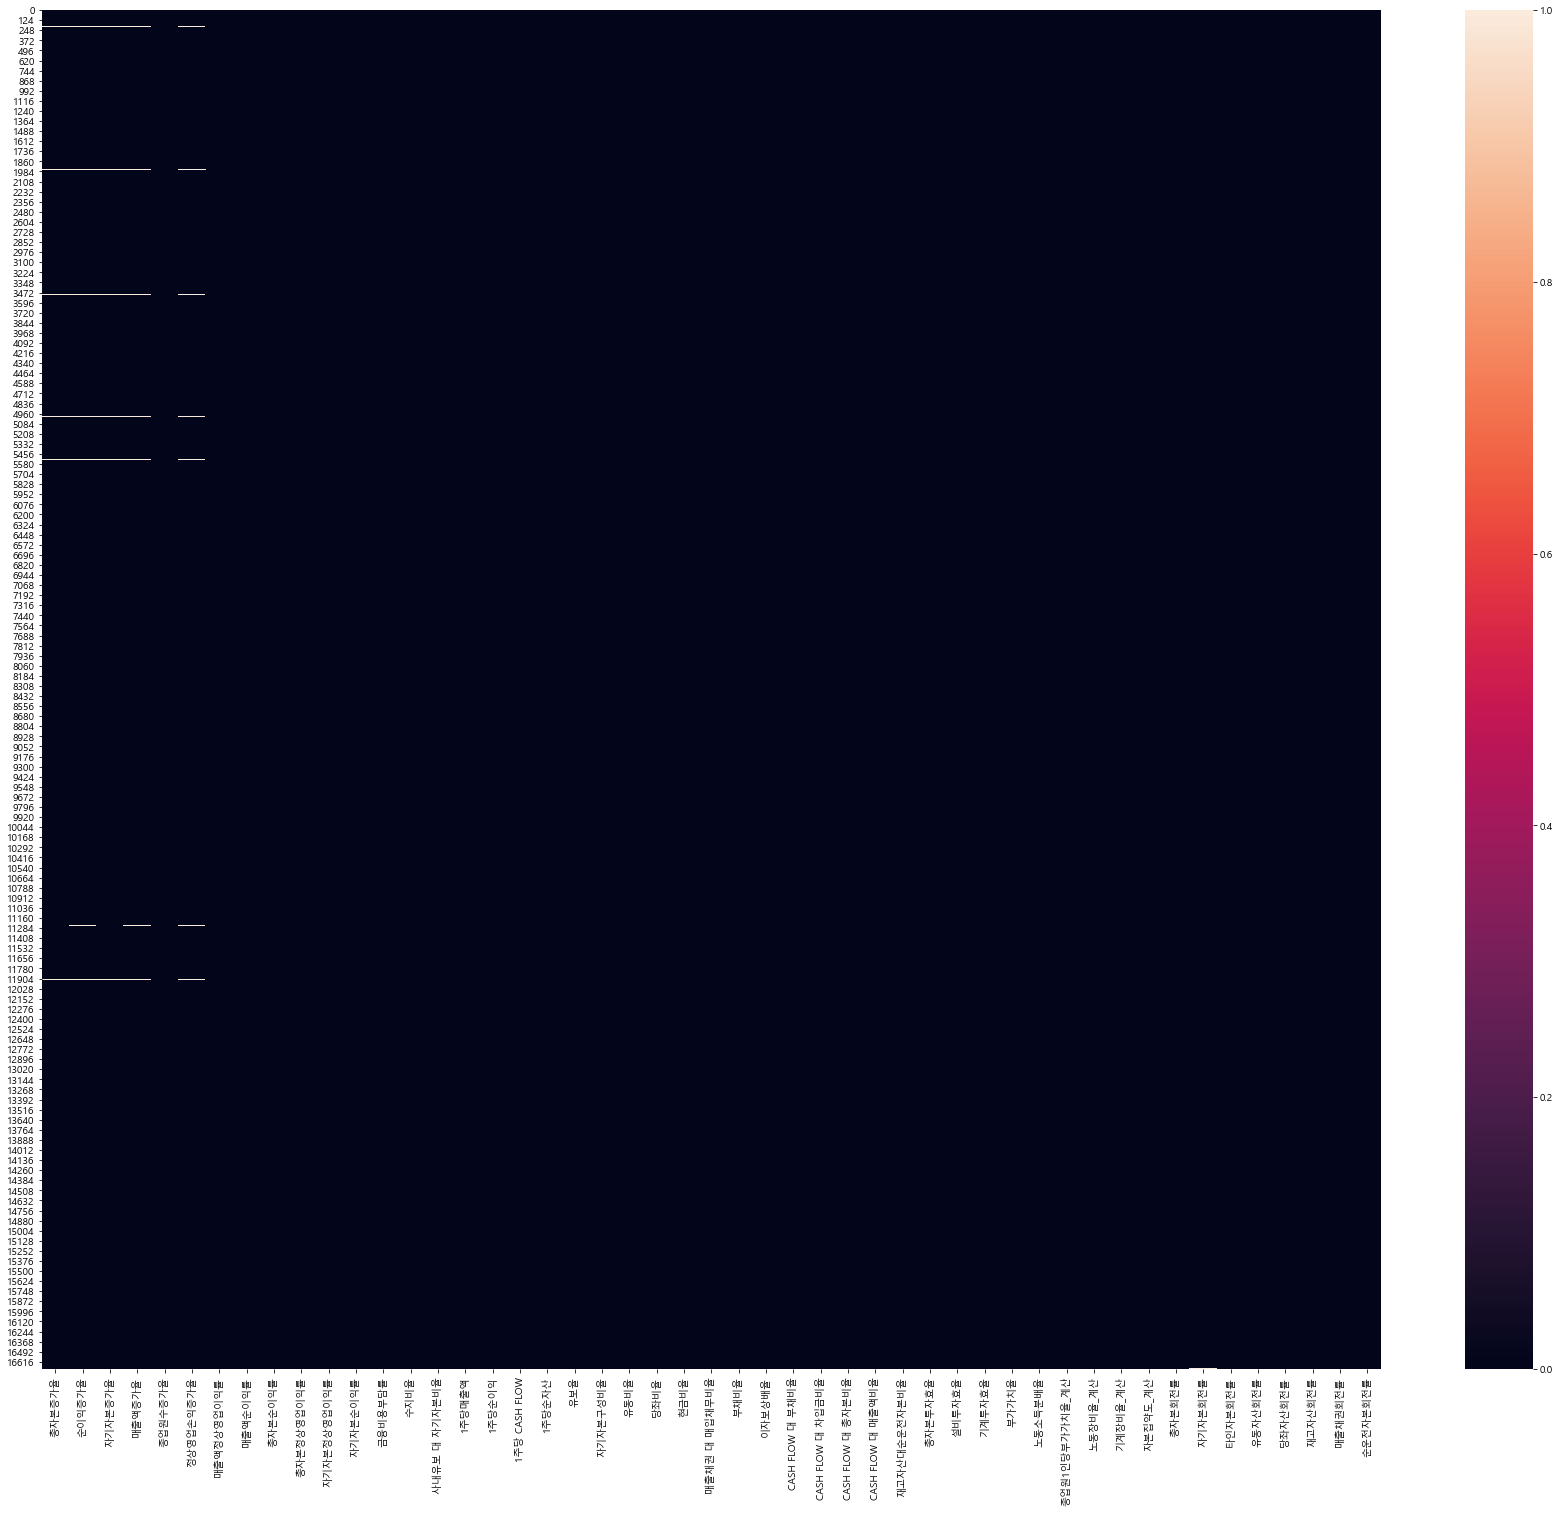

In [29]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

sns.heatmap(df_part5.iloc[:, 9:].isna())

# 정리안됨

In [25]:
# 결측치가 하나라도 있는 컬럼
df.columns[df.isna().any()]

Index(['상장폐지일', '부실기업1', '종업원수증가율', '이자보상배율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',
       '사내유보 대 자기자본비율', '1주당순자산'],
      dtype='object')

In [26]:
df[['회사명','노동장비율']][df['노동장비율'].isna()]

,회사명,노동장비율
3224,(주)서한,NaN
3225,(주)서한,NaN
5881,(주)영진코퍼레이션,NaN
11656,대림통상(주),NaN
13990,씨제이프레시웨이(주),NaN
16683,피에스케이(주),NaN


## 박스플롯

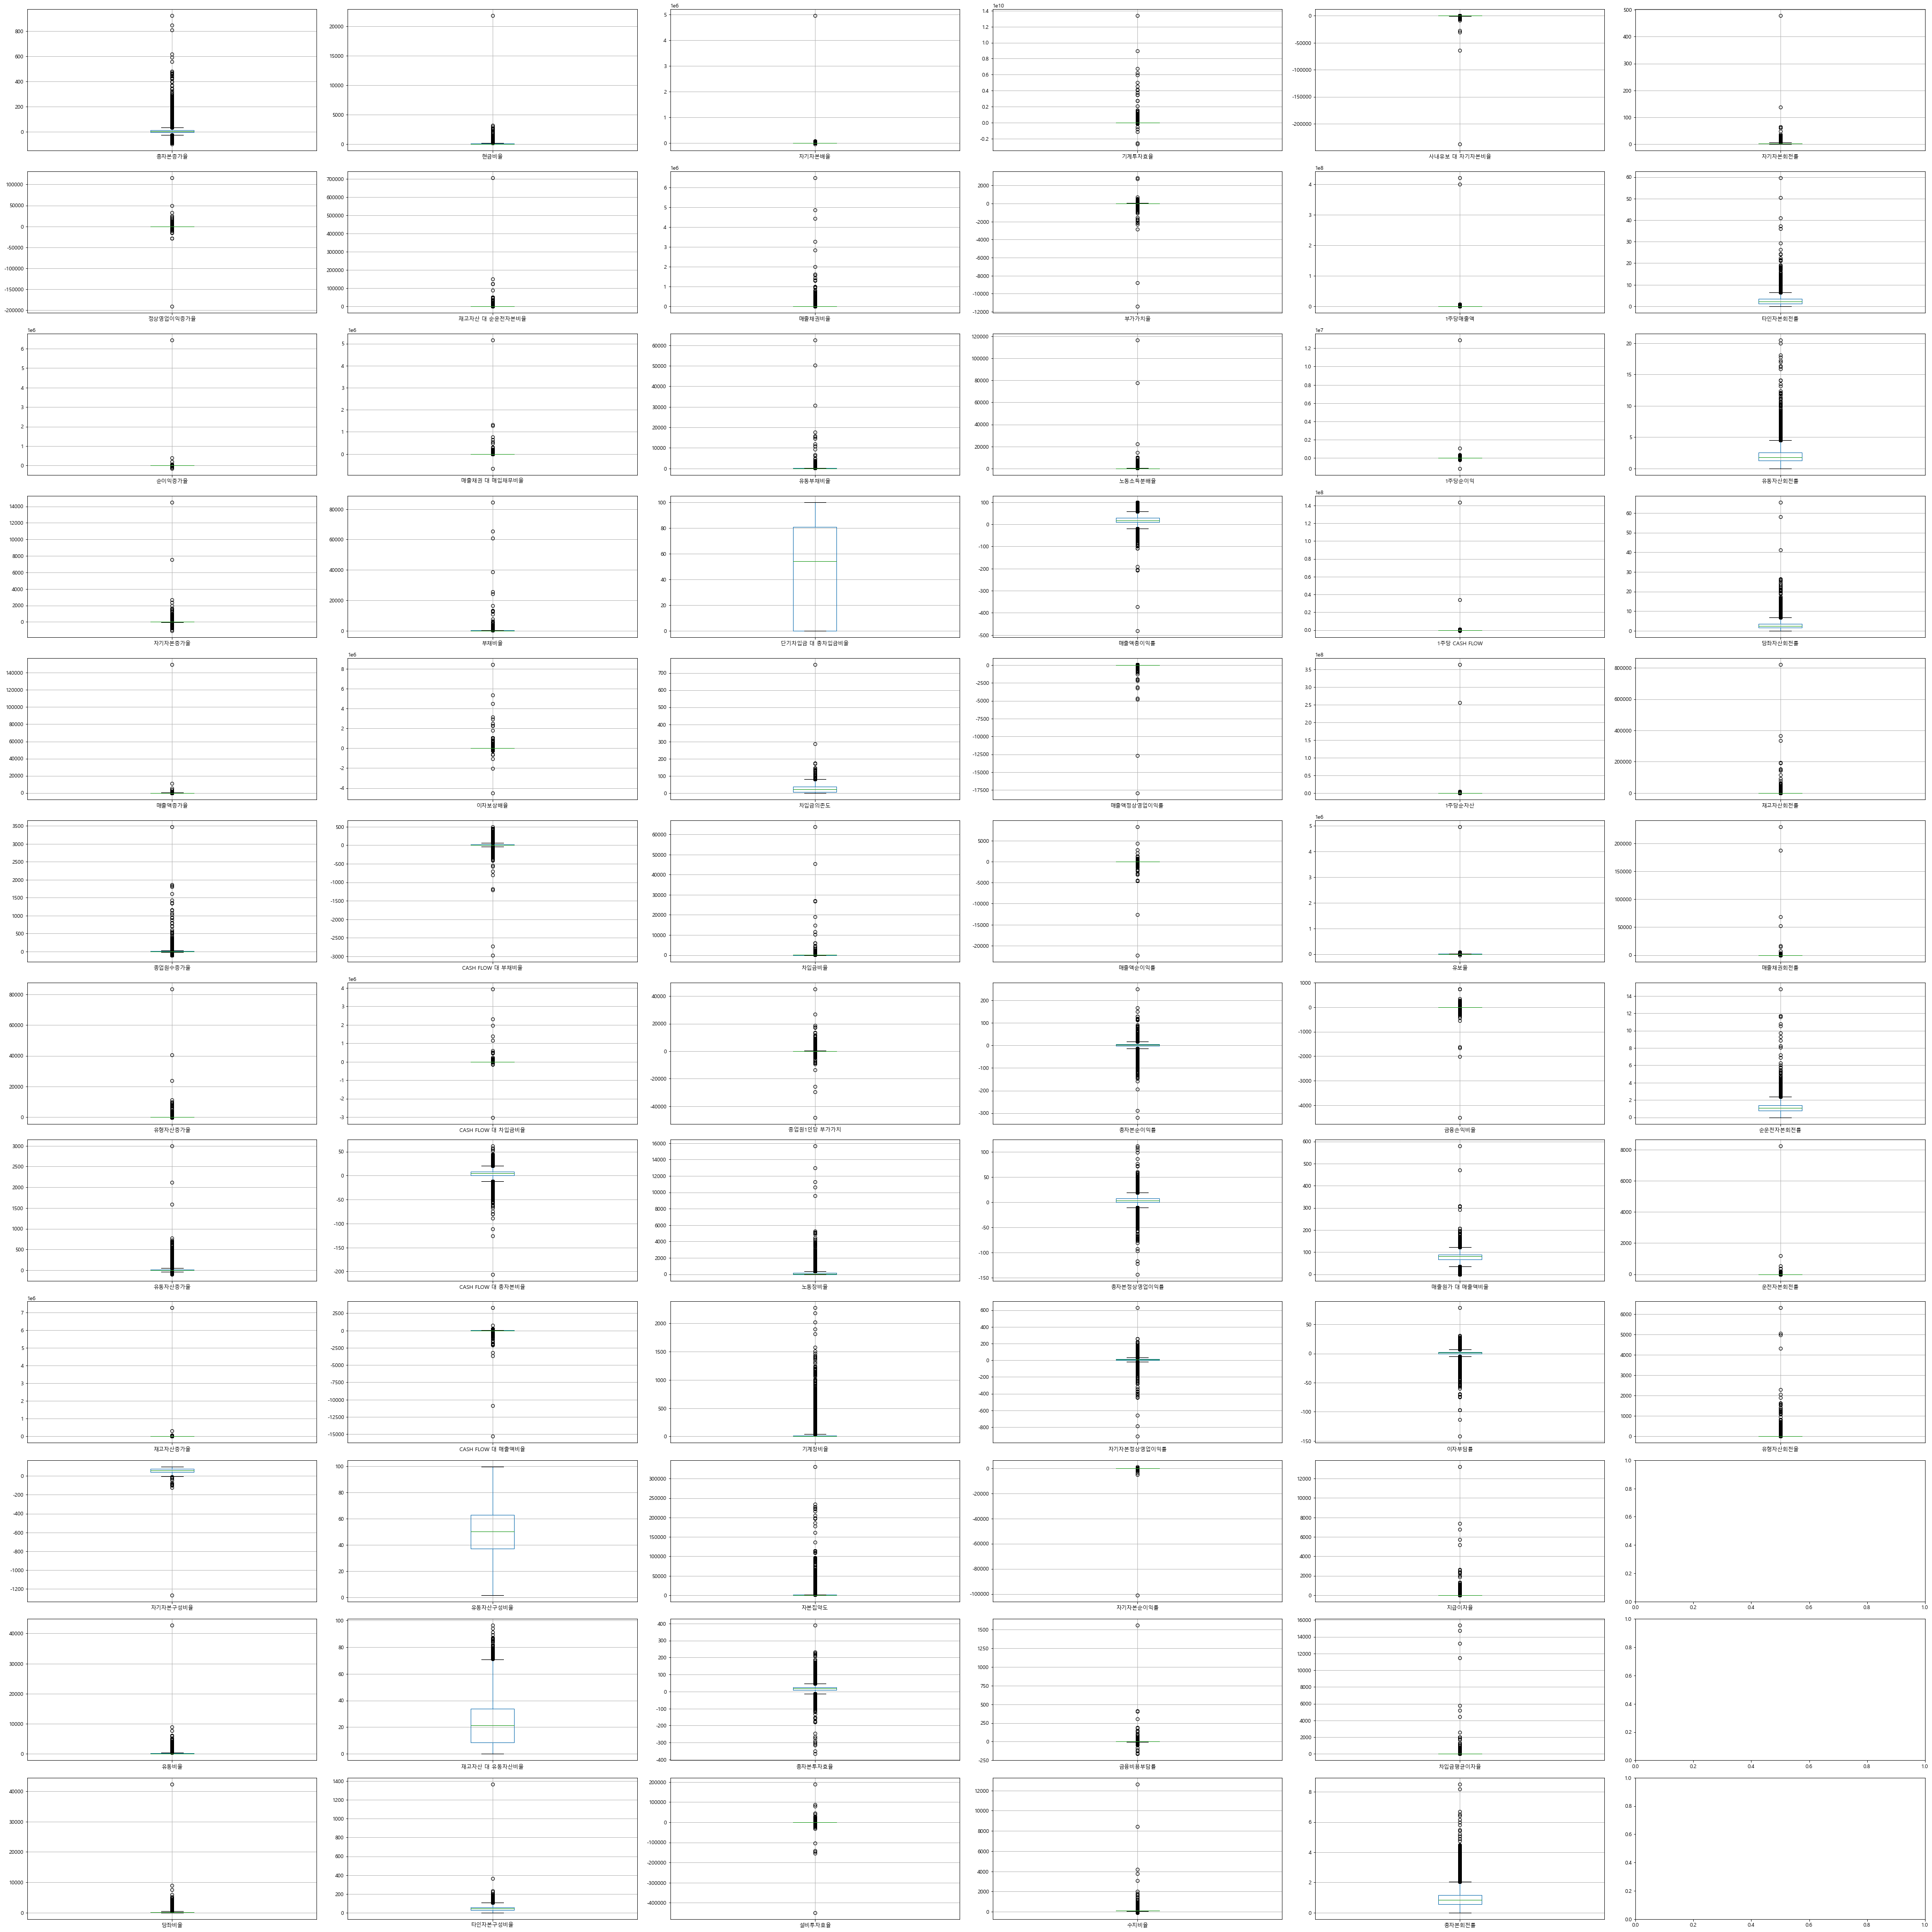

In [27]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 6
nrows = 12

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 50))

for col, ax in zip(df.columns[9:], axs.T.ravel()):
    df[[col]].boxplot(ax=ax)

plt.show()

### 이상치 확인

In [28]:
# 이상치 인덱스 확인
q1 = df['총자본증가율'].quantile(0.25)
q3 = df['총자본증가율'].quantile(0.75)
iqr = q3-q1

condition1 = df['총자본증가율']>q3+1.5*iqr
condition2 = df['총자본증가율']<q1-1.5*iqr
a = df[condition1].index
b = df[condition2].index

print(a)
print(b)

Int64Index([    1,     5,     8,    25,    28,    29,    46,    67,   143,
              221,
            ...
            17568, 17588, 17596, 17770, 17779, 17780, 17783, 17789, 17791,
            17793],
           dtype='int64', length=1406)
Int64Index([   37,    43,    92,    95,   104,   105,   137,   138,   146,
              178,
            ...
            17460, 17487, 17559, 17583, 17675, 17773, 17777, 17781, 17815,
            17816],
           dtype='int64', length=605)


In [29]:
df.loc[a, ['회사명','회계년도','총자본증가율']]

,회사명,회계년도,총자본증가율
1,(주)CMG제약,2012/12,109.15
5,(주)CMG제약,2016/12,96.31
8,(주)CMG제약,2019/12,68.07
25,(주)ES큐브,2016/12,89.08
28,(주)ES큐브,2019/12,312.66
...,...,...,...
17780,휴림로봇(주),2017/12,74.57
17783,휴림로봇(주),2020/12,217.64
17789,휴젤(주),2013/12,217.03
17791,휴젤(주),2015/12,140.18


### inf, -inf 값 확인

In [30]:
df[(df == np.inf).any(axis=1)]

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,총자본증가율,...,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률,운전자본회전률,유형자산회전율


In [31]:
df[(df == -np.inf).any(axis=1)]

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,총자본증가율,...,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률,운전자본회전률,유형자산회전율


## 정규성 검정

In [30]:
# model = sm.OLS(df['부실기업'], df.iloc[:, 9:])
# results = model.fit()
# print(results.summary())

In [32]:
# pvalue 함수
# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_columns = []
    pct_columns.append([col for col in df_name])
    for i in pct_columns:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [33]:
# 컬럼별 pvalue 값 출력
shap_pct(df.iloc[:, 9:])

총자본증가율 의 pvalue: 0.0
정상영업이익증가율 의 pvalue: 0.0
순이익증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
종업원수증가율 의 pvalue: 1.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
재고자산증가율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
재고자산 대 순운전자본비율 의 pvalue: 0.0
매출채권 대 매입채무비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
이자보상배율 의 pvalue: 1.0
CASH FLOW 대 부채비율 의 pvalue: 0.0
CASH FLOW 대 차입금비율 의 pvalue: 0.0
CASH FLOW 대 총자본비율 의 pvalue: 0.0
CASH FLOW 대 매출액비율 의 pvalue: 0.0
유동자산구성비율 의 pvalue: 1.1817016410944001e-18
재고자산 대 유동자산비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 0.0
자기자본배율 의 pvalue: 0.0
매출채권비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
단기차입금 대 총차입금비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
차입금비율 의 pvalue: 0.0
종업원1인당 부가가치 의 pvalue: 1.0
노동장비율 의 pvalue: 1.0
기계장비율 의 pvalue: 1.0
자본집약도 의 pvalue: 1.0
총자본투자효율 의 pvalue: 1.0
설비투자효율 의 pvalue: 1.0
기계투자효율 의 pvalue: 1.0
부가가치율 의 pvalue: 1.0
노동소득분배율 의 pvalue: 1.0
매출액총이익률 의 pvalue: 0.0
매출액정상영업이익률 의 pvalue: 0.0
매출액순이익률 의 pvalue: 0.0
총자본순이익률 의 pv

c:\Users\subin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 상관관계

<ipython-input-34-33f2d6a29a53>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


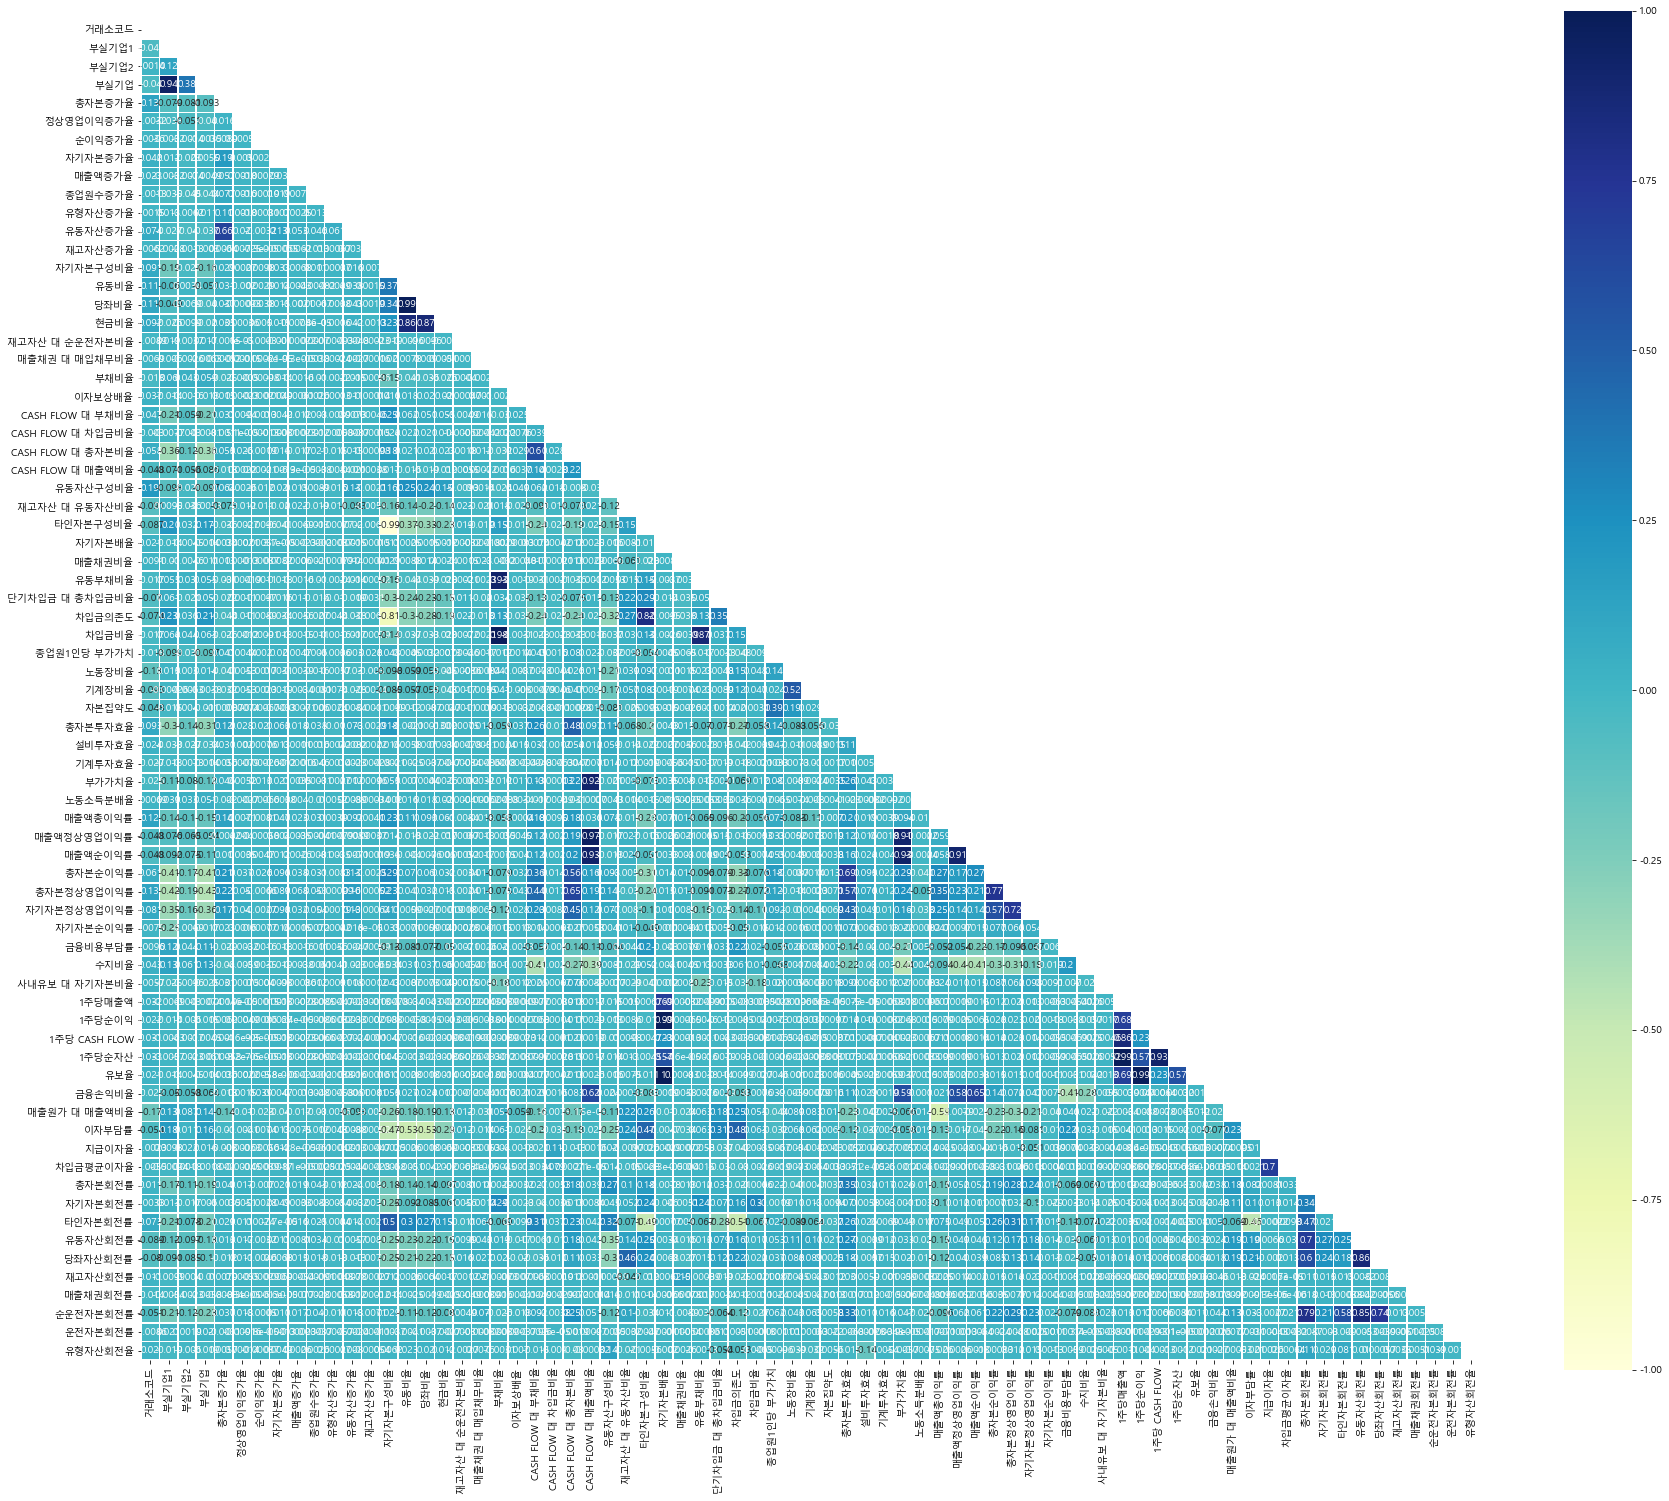

In [34]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

df_corr = df.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask, linewidths=.5, cmap="YlGnBu", square=True, vmin=-1, vmax=1)

plt.show()

In [35]:
# VIF
def feature_engineering_XbyVIF(df_cols):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(df_cols.values, i)
                        for i in range(df_cols.shape[1])]
    vif['Feature'] = df_cols.columns
    return vif

In [35]:
# feature_engineering_XbyVIF(df.iloc[:, 9:])

## 데이터셋 구분
### ver.1
    9개월(3분기) 이상 지속된 국면을 해당 국면으로 설정 후 & 그 외 혼재된 연도 삭제

In [36]:
# ver1 경기순환국면 확장기, 수축기
v1_tenth_contraction = ["2012/12"]
v1_eleventh_expansion = ["2013/12", "2014/12", "2015/12", "2016/12", "2017/12"]
v1_eleventh_contraction = ["2018/12", "2019/12"]

df[df['회계년도'].isin(v1_tenth_contraction)]

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,총자본증가율,...,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률,운전자본회전률,유형자산회전율
1,(주)CMG제약,58820,2012/12,2001/08/31,NaN,0.0,0,0,제조업,109.15,...,0.39,0.66,0.93,0.52,0.57,5.71,1.85,0.42,0.00,1.71
11,(주)DB하이텍,990,2012/12,1975/12/12,NaN,0.0,0,0,제조업,-3.44,...,0.50,1.97,0.67,2.01,2.73,7.56,8.08,0.61,0.00,0.82
21,(주)ES큐브,50120,2012/12,2002/04/25,NaN,0.0,0,0,도매 및 소매업,0.00,...,1.21,1.40,8.72,2.46,3.13,11.55,12.19,2.03,0.00,17.59
31,(주)HJ중공업,97230,2012/12,2007/08/31,NaN,0.0,0,0,건설업,-6.42,...,0.37,1.42,0.51,1.09,1.25,8.72,9.73,0.53,0.13,0.84
41,(주)MH에탄올,23150,2012/12,1996/12/24,NaN,0.0,0,0,제조업,0.13,...,0.45,1.45,0.64,1.25,1.83,3.94,6.33,0.47,0.00,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,휴림네트웍스(주),192410,2012/12,2014/08/14,NaN,0.0,0,0,제조업,0.00,...,1.91,2.61,7.12,2.30,2.67,16.62,3.67,1.74,0.23,19.86
17775,휴림로봇(주),90710,2012/12,2006/12/05,NaN,0.0,0,0,제조업,-8.50,...,0.61,1.28,1.15,0.95,1.28,3.67,1.99,0.56,0.71,3.19
17788,휴젤(주),145020,2012/12,2015/12/24,NaN,0.0,0,0,제조업,0.00,...,0.84,1.05,4.16,1.50,1.70,12.82,2.65,1.15,0.00,2.32
17798,흥구석유(주),24060,2012/12,1994/12/07,NaN,0.0,0,0,도매 및 소매업,-1.14,...,3.63,4.28,24.07,17.24,21.96,80.16,25.31,10.79,0.00,6.08


### ver.2
    6개월 이상 확장/수축이 지속된 국면을 해당 국면으로 설정

In [37]:
# ver2 경기순환국면 확장기, 수축기
v2_tenth_expansion = ["2011/12"]
v2_tenth_contraction = ["2012/12"]
v2_eleventh_expansion = ["2013/12", "2014/12", "2015/12", "2016/12", "2017/12"]
v2_eleventh_contraction = ["2018/12", "2019/12"]
v2_twelveth_expansion = ["2020/12"]

### ver.3
    해당 년도 12월이 속한 국면을 그 해의 국면으로 설정

In [38]:
# ver3 경기순환국면 확장기, 수축기
v3_tenth_contraction = ["2011/12", "2012/12"]
v3_eleventh_expansion = ["2013/12", "2014/12", "2015/12", "2016/12"]
v3_eleventh_contraction = ["2017/12", "2018/12", "2019/12"]
v3_twelveth_expansion = ["2020/12"]

---